<a href="https://colab.research.google.com/github/karma-os/Kaggle_study/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Kernel study


#### 1st: Titanic


(1-1) EDA



In [ ]:
#Library Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os

plt.style.use("seaborn")
sns.set(font_scale = 2.5) #font_size 지정안하고 이러는게 편하대
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline




In [ ]:
#Initial Setting for data storage

!mkdir -p /content/drive/MyDrive/Kaggle_kernel/data/titanic
os.chdir("/content/drive/MyDrive/Kaggle_kernel/data/titanic")


In [ ]:
#Dataset Load

INITIAL_RUN=True
FILE_DOWNLOAD_COMPLETE=True

if INITIAL_RUN:
    !mkdir /root/.kaggle
    !cp /content/drive/MyDrive/Kaggle/kaggle.json  /root/.kaggle/kaggle.json   # kaggl.json위치 지정
    !chmod 600 /root/.kaggle/kaggle.json
    !kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 8.21MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 3.84MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 445kB/s]


#Overall Process

1. dataset 확인

2. EDA

3. feature eng

4. model selection

5. model training & prediction

6. model evaluation








In [ ]:

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Train_feature : Pclass, Age, SibSp, Parch, Fare 
# Target_feature : Survived

In [ ]:
#Info : column 별 정보.
#Describe : 수치형 정보
"""
Age , Cabin, Embarked : Null 값이 있음(Cabin은 심각하게 많음)
Age가 float64로 되어있으며, min-max가 0.42~ 80으로 되어있네.
"""


df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


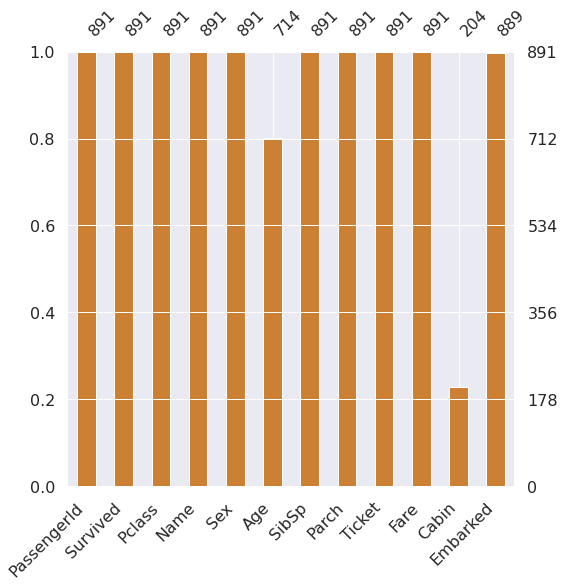

In [ ]:
#Null data check





def check_null(options = 1):
    ## 1. isnull().sum() 이용
    if options == 1:

        print("=====Train=====")
        for col in df_train.columns:
            msg = "column: {:>10}\t Percent of NaN Value: {:.2f}".format(
                col, 100 * (df_train[col].isnull().sum() / df_train.shape[0])
            )
            print(msg)
        print()
        print("=====Test=====")

        for col in df_test.columns:
            msg = "column: {:>10}\t Percent of NaN Value: {:.2f}".format(
                col, 100 * (df_test[col].isnull().sum() / df_test.shape[0])
            )
            print(msg)
    elif options == 2:
        msno.bar(df = df_train, figsize = (8,8), color = (0.8, 0.5, 0.2))




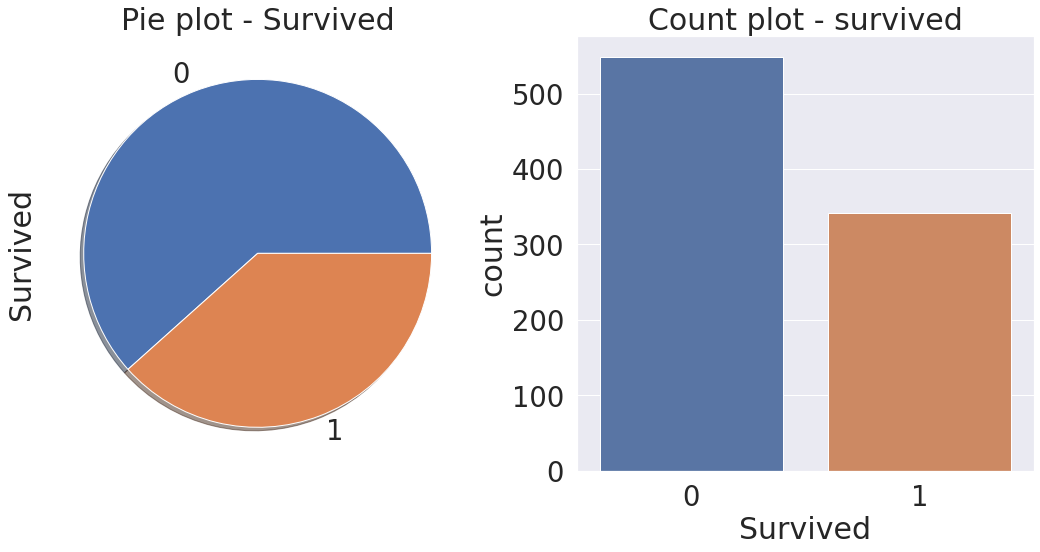

In [ ]:
#Target label 확인
"""
1과 0의 분포에 따라 평가 방법이 바뀔 수 있다.

확인 결과 Imbalanced는 아니므로, keep going!
"""

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (18,8))

df_train["Survived"].value_counts().plot.pie(
     ax = ax[0], shadow = True
)
ax[0].set_title("Pie plot - Survived")
ax[0].set_label("")


sns.countplot("Survived", data = df_train, ax = ax[1])
ax[1].set_title("Count plot - survived")

plt.show()


# 2. EDA

- 보통 matplotlib, seaborn, plotly를 많이 씀.

- 경우에 맞게 참고해서 쓸 것!

In [ ]:
#Pclass에 따라 묶는건데, count()는 단순히 Pclass별로 묶은거임.
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).count()

#실제 생존자를 새려면 이걸 sum()해야지. 1만 더해야 생존자 수니깐.

df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


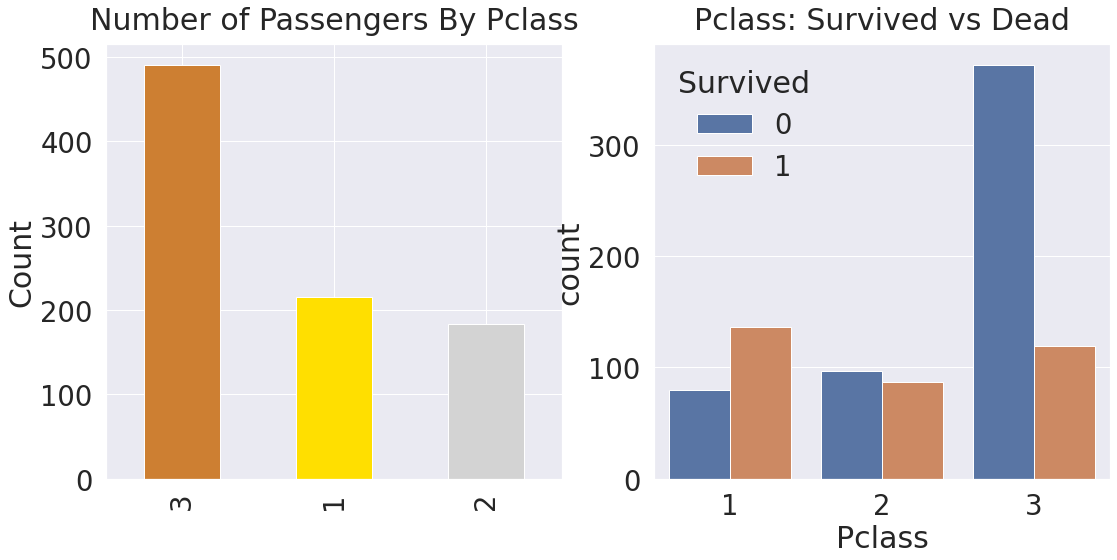

In [ ]:
#PClass and Surival_Rate
"""
Class가 높을수록(1등객일수록 잘 살아남는다)
"""

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

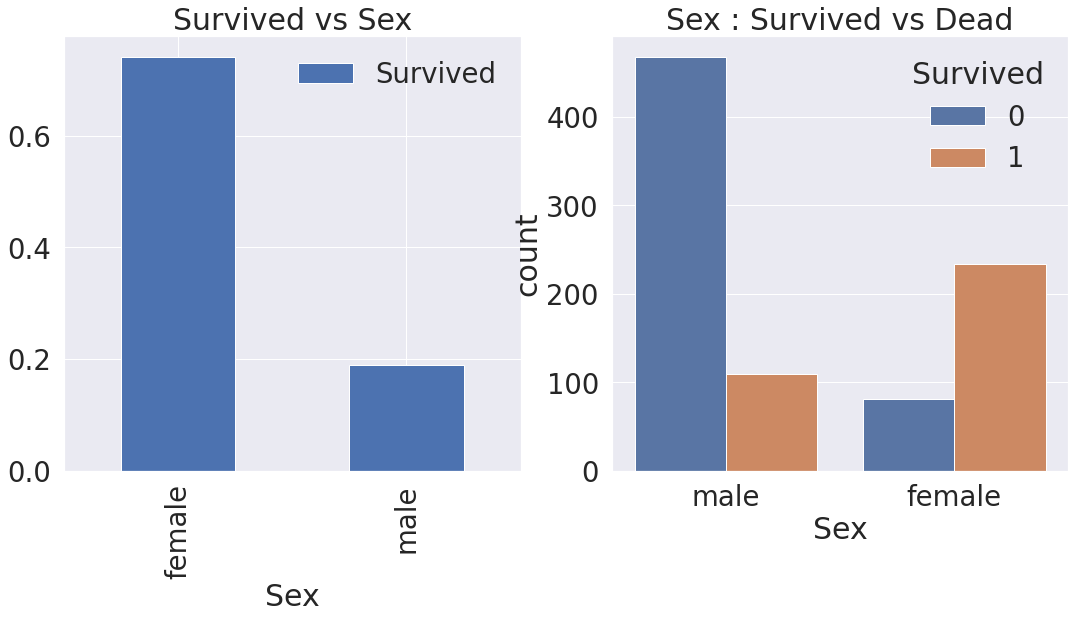

In [ ]:
#Sex and Survival Rate

fig, ax = plt.subplots(1,2, figsize = (18,8))
df_train[["Sex", "Survived"]].groupby(["Sex"], as_index= True).mean().plot.bar(ax = ax[0])
ax[0].set_title("Survived vs Sex")

sns.countplot("Sex", hue = "Survived", data = df_train, ax = ax[1])
ax[1].set_title("Sex : Survived vs Dead")

plt.show()

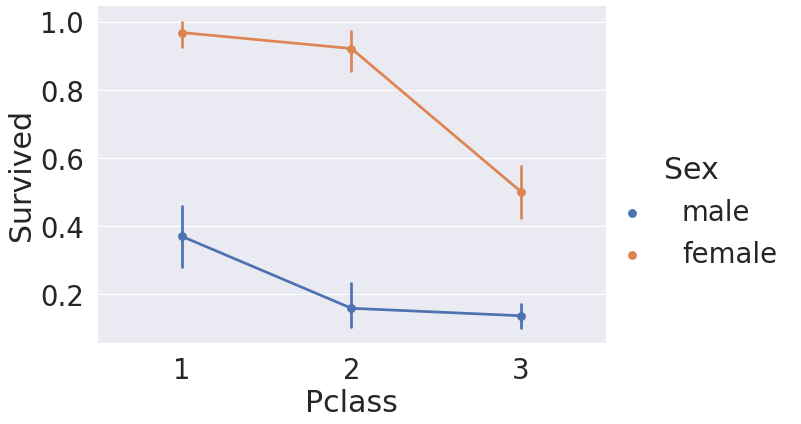

In [ ]:
#Both Sex and PClass
#여러개를 할 때는 sns의 factorplot이 편하다!

sns.factorplot("Pclass", "Survived", hue = "Sex", data= df_train, size = 6, aspect = 1.5)


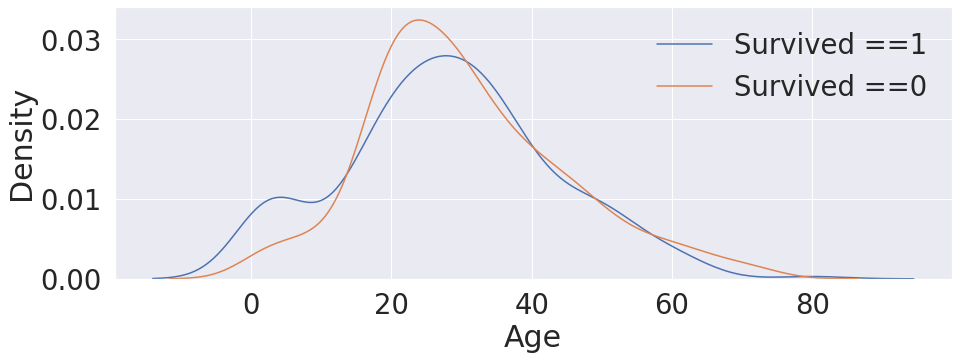

In [ ]:
#Age
"""
Kde(kernel density estimate)이라고, 데이터셋의 확률분포를 쓰나봐! 

-> 관찰 결과, 나이가 어릴수록 비율이 높다!


"""
f, ax = plt.subplots(1,1, figsize = (15,5))

survived = df_train[df_train["Survived"] ==1]["Age"]
dead     = df_train[df_train["Survived"] ==0]["Age"]

sns.kdeplot(survived, ax = ax)
sns.kdeplot(dead, ax = ax)
plt.legend(["Survived ==1", "Survived ==0"])
plt.show()



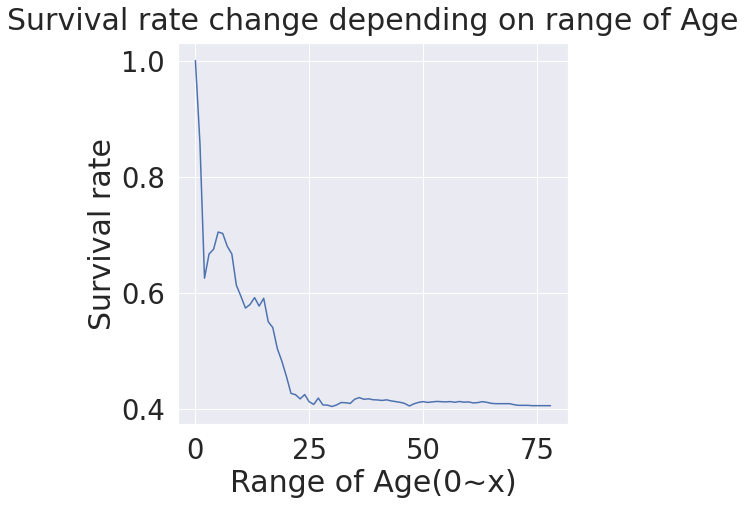

In [ ]:
#Cumulative 하게 plot할 수도 있겠구나!

cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

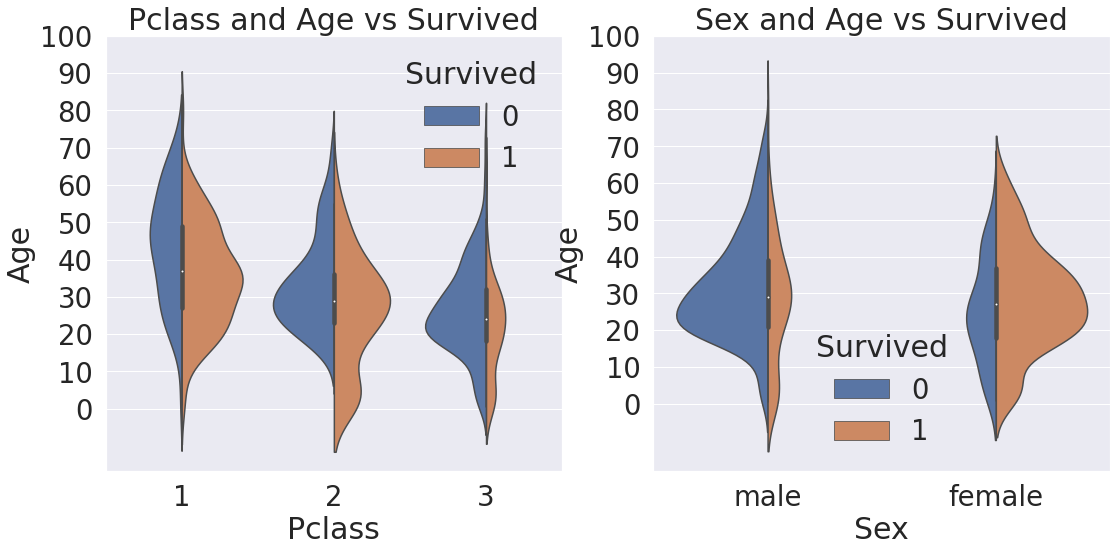

In [ ]:
# 3개 모두 보고 싶다면 violinplot (kdeplot 상위호환 느낌?)

f, ax = plt.subplots(1,2, figsize = (18,8))

sns.violinplot("Pclass", "Age", hue = "Survived", data= df_train, scale = "count", split = True, ax = ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue = "Survived", data= df_train, scale="count", split = True, ax = ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

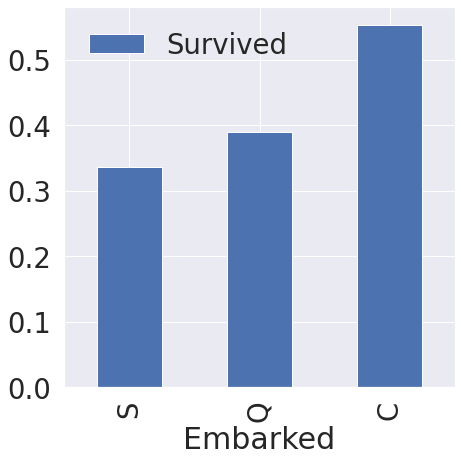

In [ ]:
# Embarked

fig, ax = plt.subplots(1,1, figsize = (7,7))
df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = True).mean().sort_values(by = "Survived").plot.bar(ax= ax)

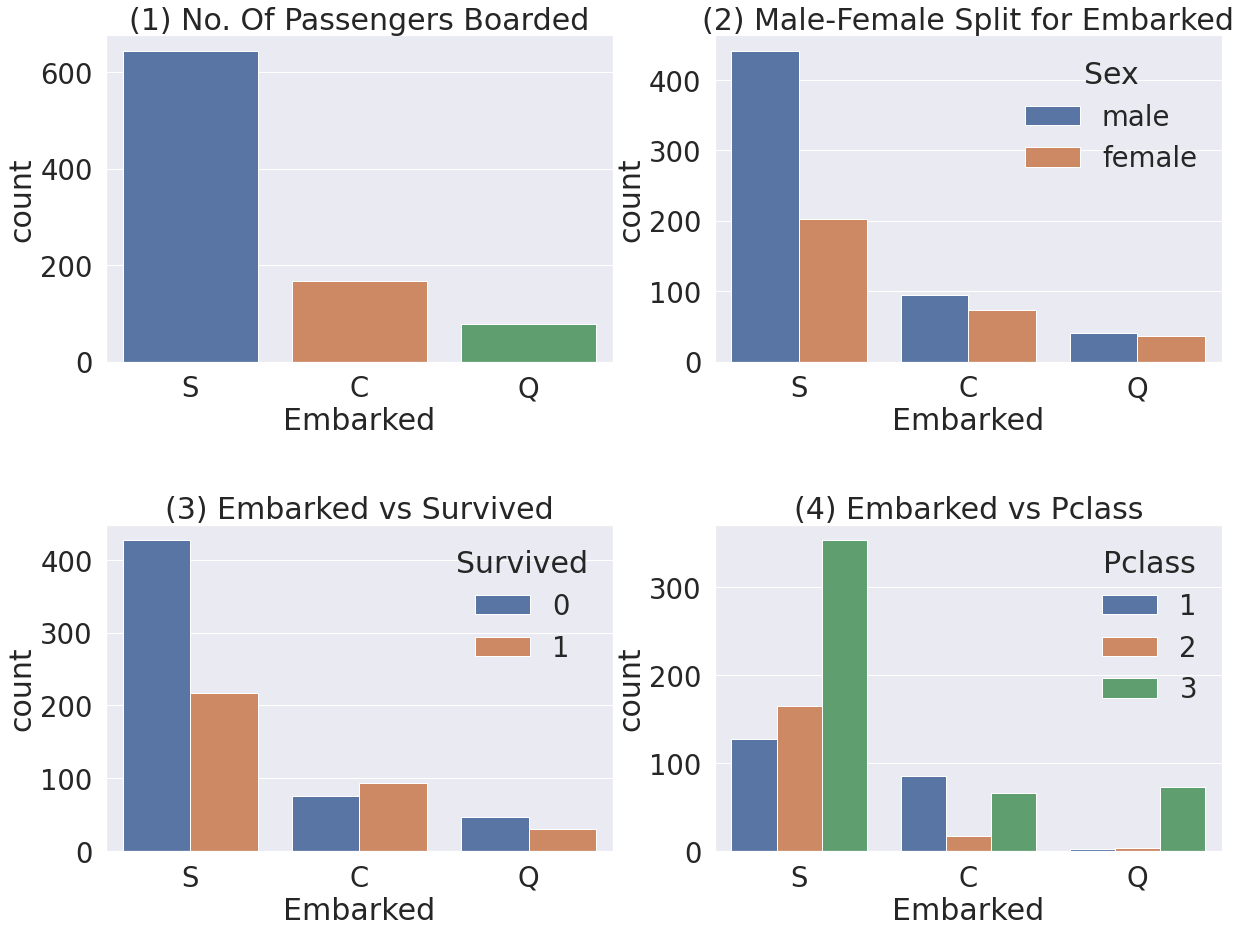

In [ ]:
#다르게 plot!
"""
S에서 많은 사람이 탔으며, S는 남자가 더 많다.

S는 잘 못 살아남는데, C가 생존확률이 높은 건 클래스 비율 때문임.
"""

f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
#Feature Engineering

df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1 #자기자신까지

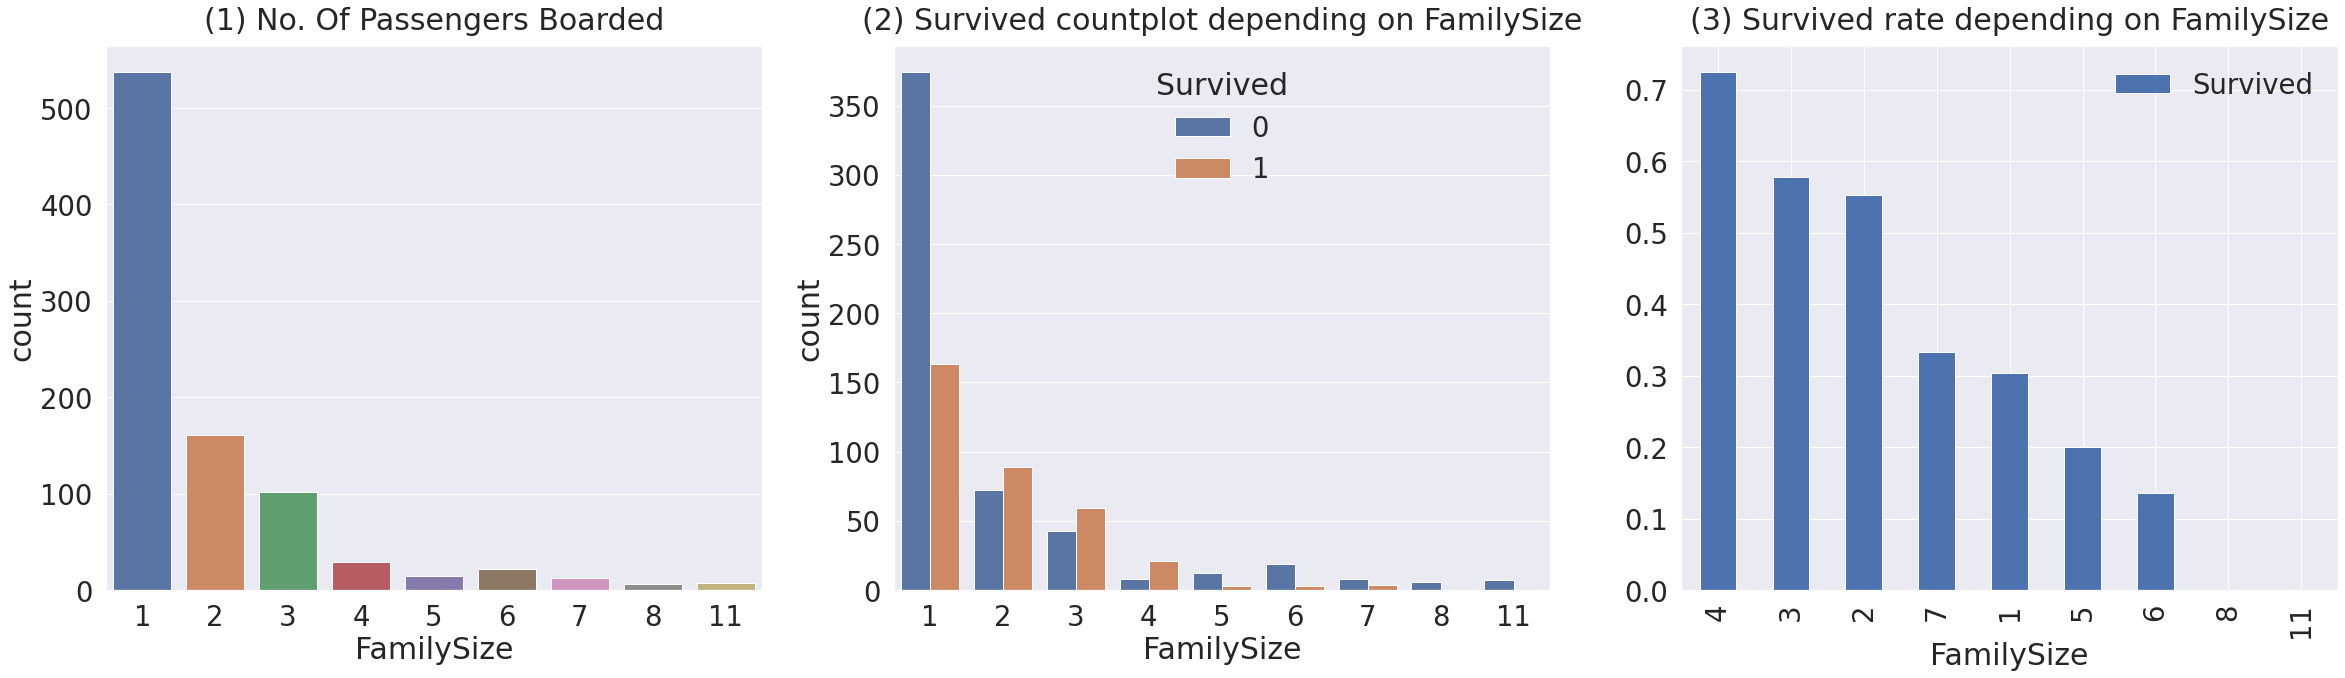

In [ ]:
"""
가족 수 3~4명에서 
"""


f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

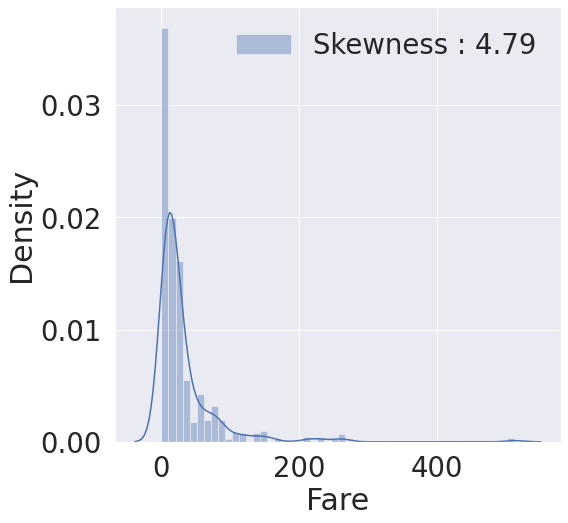

In [ ]:
#Fare
"""
Fare 자체가 skew되어있어서 log-scale로 skewness를 좀더 줄여줄 것!
"""

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')





In [ ]:
#Cabin : 생략


In [ ]:
#Ticket:
pd.set_option('display.max_columns',100)
df_train["Ticket"].value_counts()

CA. 2343    7
1601        7
347082      7
3101295     6
347088      6
           ..
112052      1
111320      1
7267        1
13509       1
2683        1
Name: Ticket, Length: 681, dtype: int64